In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## **Exploratory Data Analysis**

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
df=pd.read_csv("/content/drive/My Drive/hour.csv")

In [89]:
#names=datasets.load_diabetes()['feature_names']
#names.append('target')
#df=pd.DataFrame(np.concatenate((diabetes_X,np.reshape(diabetes_y,(diabetes_y.shape[0],1))),axis=1),columns=names)
print(df)

       instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0            1  2011-01-01       1   0  ...     0.0000       3          13   16
1            2  2011-01-01       1   0  ...     0.0000       8          32   40
2            3  2011-01-01       1   0  ...     0.0000       5          27   32
3            4  2011-01-01       1   0  ...     0.0000       3          10   13
4            5  2011-01-01       1   0  ...     0.0000       0           1    1
...        ...         ...     ...  ..  ...        ...     ...         ...  ...
17374    17375  2012-12-31       1   1  ...     0.1642      11         108  119
17375    17376  2012-12-31       1   1  ...     0.1642       8          81   89
17376    17377  2012-12-31       1   1  ...     0.1642       7          83   90
17377    17378  2012-12-31       1   1  ...     0.1343      13          48   61
17378    17379  2012-12-31       1   1  ...     0.1343      12          37   49

[17379 rows x 17 columns]


In [90]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


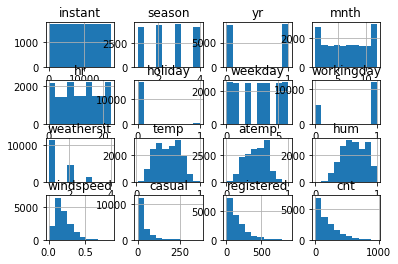

In [91]:
df.hist()
plt.show()

In [110]:
df=df.drop(['dteday','casual','registered'],axis=1)
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


###*Data standardization*###

In [111]:
scaler=MinMaxScaler()
dataset=scaler.fit_transform(df)


In [112]:
names=df.columns
#names.append('target')
df=pd.DataFrame(dataset,columns=names)
print(df)

        instant  season   yr  mnth  ...   atemp   hum  windspeed       cnt
0      0.000000     0.0  0.0   0.0  ...  0.2879  0.81   0.000000  0.015369
1      0.000058     0.0  0.0   0.0  ...  0.2727  0.80   0.000000  0.039959
2      0.000115     0.0  0.0   0.0  ...  0.2727  0.80   0.000000  0.031762
3      0.000173     0.0  0.0   0.0  ...  0.2879  0.75   0.000000  0.012295
4      0.000230     0.0  0.0   0.0  ...  0.2879  0.75   0.000000  0.000000
...         ...     ...  ...   ...  ...     ...   ...        ...       ...
17374  0.999770     0.0  1.0   1.0  ...  0.2576  0.60   0.193018  0.120902
17375  0.999827     0.0  1.0   1.0  ...  0.2576  0.60   0.193018  0.090164
17376  0.999885     0.0  1.0   1.0  ...  0.2576  0.60   0.193018  0.091189
17377  0.999942     0.0  1.0   1.0  ...  0.2727  0.56   0.157870  0.061475
17378  1.000000     0.0  1.0   1.0  ...  0.2727  0.65   0.157870  0.049180

[17379 rows x 14 columns]


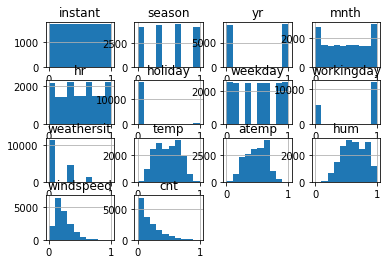

In [113]:
df.hist()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

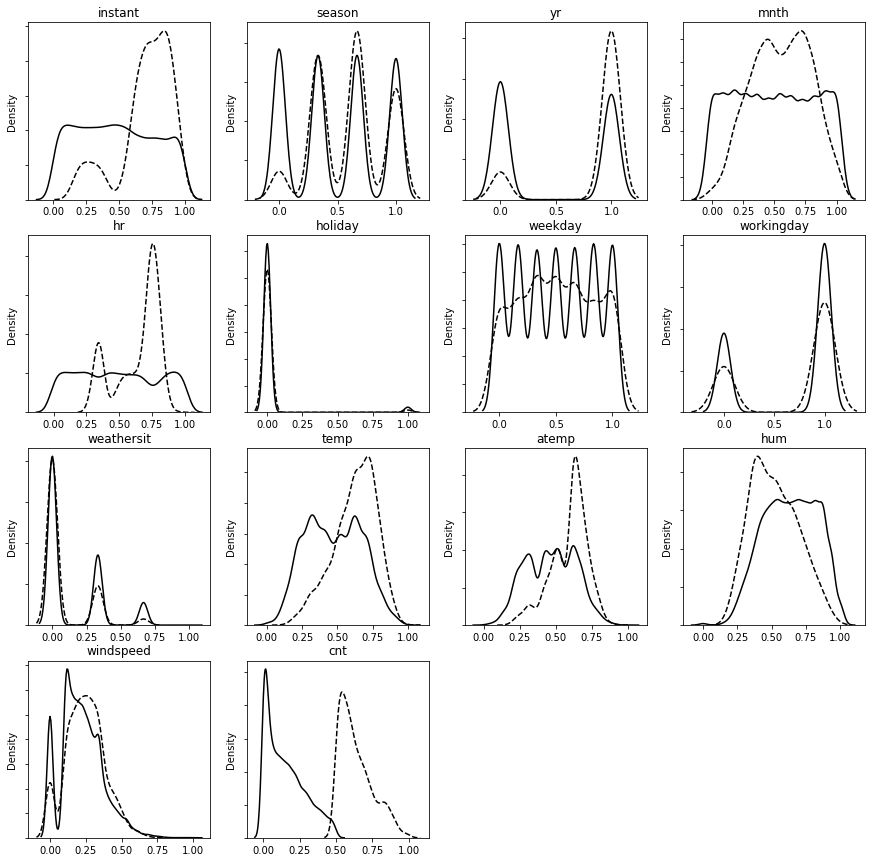

In [117]:
import seaborn as sns

# create a subplot of 3 x 3
plt.subplots(4,4,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(4,4,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.cnt <= 0.5][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"Count less"})
    sns.distplot(df.loc[df.cnt > 0.5][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':"Count more"})
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(4,4,15).set_visible(False)
plt.subplot(4,4,16).set_visible(False)

## **Data Preprocessing**

###*Handling missing values*###

In [118]:
df.isnull().any()

instant       False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
dtype: bool

In [119]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.5000,0.500547,0.502561,0.503434,0.502033,0.028770,0.500614,0.682721,0.141761,0.486722,0.475775,0.627229,0.223460,0.193097
std,0.2887,0.368973,0.500008,0.312616,0.300626,0.167165,0.334295,0.465431,0.213119,0.196486,0.171850,0.192930,0.143811,0.185848
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.2500,0.333333,0.000000,0.272727,0.260870,0.000000,0.166667,0.000000,0.000000,0.326531,0.333300,0.480000,0.122840,0.039959
50%,0.5000,0.666667,1.000000,0.545455,0.521739,0.000000,0.500000,1.000000,0.000000,0.489796,0.484800,0.630000,0.228047,0.144467
75%,0.7500,0.666667,1.000000,0.818182,0.782609,0.000000,0.833333,1.000000,0.333333,0.653061,0.621200,0.780000,0.298225,0.286885
max,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
instant: 1
season: 4242
yr: 8645
mnth: 1429
hr: 726
holiday: 16879
weekday: 2502
workingday: 5514
weathersit: 11413
temp: 17
atemp: 2
hum: 22
windspeed: 2180
cnt: 158


###*Splitting the data into training, testing, and validation sets*###

In [121]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'cnt']
y = df.loc[:, 'cnt']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## **Model Building in Python Using MLP from sklearn**

###*Model building*###

In [134]:
from sklearn.neural_network import MLPRegressor

regr_id = MLPRegressor(hidden_layer_sizes=(100),activation="identity",random_state=1, max_iter=5000).fit(X_train, y_train)

In [137]:
print("R-squared coefficient:",regr_id.score(X_test,y_test))

R-squared coefficient: 0.3789619059604866


In [162]:
res_id=scaler.inverse_transform(np.concatenate((X_test,np.array(regr_id.predict(X_test)).reshape(X_test.shape[0],1)),axis=1))
names=X_test.columns.values.tolist()
names.append("cnt")
res_id=pd.DataFrame(res_id,columns=names)
res_id.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,7456.0,4.0,0.0,11.0,6.0,0.0,6.0,0.0,1.0,0.22,0.2273,0.75,0.1642,26.844258
1,2600.0,2.0,0.0,4.0,5.0,0.0,6.0,0.0,3.0,0.34,0.3636,1.00,0.0000,-32.462517
2,4977.0,3.0,0.0,7.0,6.0,0.0,0.0,0.0,1.0,0.74,0.6970,0.70,0.0000,161.538602
3,16063.0,4.0,1.0,11.0,23.0,0.0,2.0,1.0,1.0,0.30,0.2879,0.56,0.2239,291.806762
4,4163.0,3.0,0.0,6.0,8.0,0.0,1.0,1.0,1.0,0.66,0.6212,0.74,0.1940,153.927398


In [138]:
regr_relu = MLPRegressor(hidden_layer_sizes=(100,100),random_state=1, max_iter=5000).fit(X_train, y_train)
print("R-squared coefficient:",regr_relu.score(X_test,y_test))

R-squared coefficient: 0.9093603956279065


In [163]:
res_relu=scaler.inverse_transform(np.concatenate((X_test,np.array(regr_relu.predict(X_test)).reshape(X_test.shape[0],1)),axis=1))
names=X_test.columns.values.tolist()
names.append("cnt")
res_relu=pd.DataFrame(res_relu,columns=names)
res_relu.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,7456.0,4.0,0.0,11.0,6.0,0.0,6.0,0.0,1.0,0.22,0.2273,0.75,0.1642,-2.177850
1,2600.0,2.0,0.0,4.0,5.0,0.0,6.0,0.0,3.0,0.34,0.3636,1.00,0.0000,3.681624
2,4977.0,3.0,0.0,7.0,6.0,0.0,0.0,0.0,1.0,0.74,0.6970,0.70,0.0000,43.379178
3,16063.0,4.0,1.0,11.0,23.0,0.0,2.0,1.0,1.0,0.30,0.2879,0.56,0.2239,60.644104
4,4163.0,3.0,0.0,6.0,8.0,0.0,1.0,1.0,1.0,0.66,0.6212,0.74,0.1940,378.643681


In [139]:
regr_tanh = MLPRegressor(hidden_layer_sizes=(100,100,100),activation="tanh",random_state=1, max_iter=5000).fit(X_train, y_train)
regr.score(X_test,y_test)

0.9023821397719893

In [164]:
res_tanh=scaler.inverse_transform(np.concatenate((X_test,np.array(regr_tanh.predict(X_test)).reshape(X_test.shape[0],1)),axis=1))
names=X_test.columns.values.tolist()
names.append("cnt")
res_tanh=pd.DataFrame(res_tanh,columns=names)
res_tanh.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,7456.0,4.0,0.0,11.0,6.0,0.0,6.0,0.0,1.0,0.22,0.2273,0.75,0.1642,9.455319
1,2600.0,2.0,0.0,4.0,5.0,0.0,6.0,0.0,3.0,0.34,0.3636,1.00,0.0000,19.933906
2,4977.0,3.0,0.0,7.0,6.0,0.0,0.0,0.0,1.0,0.74,0.6970,0.70,0.0000,-43.230978
3,16063.0,4.0,1.0,11.0,23.0,0.0,2.0,1.0,1.0,0.30,0.2879,0.56,0.2239,118.843150
4,4163.0,3.0,0.0,6.0,8.0,0.0,1.0,1.0,1.0,0.66,0.6212,0.74,0.1940,468.886461


In [184]:
res_test=scaler.inverse_transform(np.concatenate((X_test,np.array(y_test).reshape(X_test.shape[0],1)),axis=1))
names=X_test.columns.values.tolist()
names.append("cnt")
res_test=pd.DataFrame(res_test,columns=names)
res_test.head()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,7456.0,4.0,0.0,11.0,6.0,0.0,6.0,0.0,1.0,0.22,0.2273,0.75,0.1642,7.0
1,2600.0,2.0,0.0,4.0,5.0,0.0,6.0,0.0,3.0,0.34,0.3636,1.00,0.0000,7.0
2,4977.0,3.0,0.0,7.0,6.0,0.0,0.0,0.0,1.0,0.74,0.6970,0.70,0.0000,13.0
3,16063.0,4.0,1.0,11.0,23.0,0.0,2.0,1.0,1.0,0.30,0.2879,0.56,0.2239,205.0
4,4163.0,3.0,0.0,6.0,8.0,0.0,1.0,1.0,1.0,0.66,0.6212,0.74,0.1940,447.0


In [185]:
y_test=res_test["cnt"]

###*Model compilation*###

## **Results Analysis** ##

In [140]:
from sklearn import metrics

###*1 hidden layer - 100 units*###

In [186]:
nam=['explained_variance','max_error','mean_absolute_error','mean_squared_error','root_mean_squared_error','median_absolute_error','r2']
res=pd.DataFrame(np.zeros((3,len(nam))),columns=nam)


In [187]:
res.iloc[0,0]=metrics.explained_variance_score(y_test,res_id.iloc[:,-1])
res.iloc[0,1]=metrics.max_error(y_test,res_id.iloc[:,-1])
res.iloc[0,2]=metrics.mean_absolute_error(y_test,res_id.iloc[:,-1])
res.iloc[0,3]=metrics.mean_squared_error(y_test,res_id.iloc[:,-1])
res.iloc[0,4]=np.sqrt(metrics.mean_squared_error(y_test,res_id.iloc[:,-1]))
#res.iloc[0,5]=metrics.mean_squared_log_error(y_test,res_id.iloc[:,-1])
res.iloc[0,5]=metrics.median_absolute_error(y_test,res_id.iloc[:,-1])
res.iloc[0,6]=metrics.r2_score(y_test,res_id.iloc[:,-1])
#res.iloc[0,7]=metrics.mean_poisson_deviance(y_test,res_id.iloc[:,-1])
#res.iloc[0,8]=metrics.mean_gamma_deviance(y_test,res_id.iloc[:,-1])

In [188]:
res.iloc[1,0]=metrics.explained_variance_score(y_test,res_relu.iloc[:,-1])
res.iloc[1,1]=metrics.max_error(y_test,res_relu.iloc[:,-1])
res.iloc[1,2]=metrics.mean_absolute_error(y_test,res_relu.iloc[:,-1])
res.iloc[1,3]=metrics.mean_squared_error(y_test,res_relu.iloc[:,-1])
res.iloc[1,4]=np.sqrt(metrics.mean_squared_error(y_test,res_relu.iloc[:,-1]))
#res.iloc[0,5]=metrics.mean_squared_log_error(y_test,res_id.iloc[:,-1])
res.iloc[1,5]=metrics.median_absolute_error(y_test,res_relu.iloc[:,-1])
res.iloc[1,6]=metrics.r2_score(y_test,res_relu.iloc[:,-1])
#res.iloc[0,7]=metrics.mean_poisson_deviance(y_test,res_id.iloc[:,-1])
#res.iloc[0,8]=metrics.mean_gamma_deviance(y_test,res_id.iloc[:,-1])

In [189]:
res.iloc[2,0]=metrics.explained_variance_score(y_test,res_tanh.iloc[:,-1])
res.iloc[2,1]=metrics.max_error(y_test,res_tanh.iloc[:,-1])
res.iloc[2,2]=metrics.mean_absolute_error(y_test,res_tanh.iloc[:,-1])
res.iloc[2,3]=metrics.mean_squared_error(y_test,res_tanh.iloc[:,-1])
res.iloc[2,4]=np.sqrt(metrics.mean_squared_error(y_test,res_tanh.iloc[:,-1]))
#res.iloc[0,5]=metrics.mean_squared_log_error(y_test,res_id.iloc[:,-1])
res.iloc[2,5]=metrics.median_absolute_error(y_test,res_tanh.iloc[:,-1])
res.iloc[2,6]=metrics.r2_score(y_test,res_tanh.iloc[:,-1])
#res.iloc[0,7]=metrics.mean_poisson_deviance(y_test,res_id.iloc[:,-1])
#res.iloc[0,8]=metrics.mean_gamma_deviance(y_test,res_id.iloc[:,-1])

In [190]:
res.head()

,explained_variance,max_error,mean_absolute_error,mean_squared_error,root_mean_squared_error,median_absolute_error,r2
0,0.379031,611.767561,105.542018,20365.770833,142.708692,80.501030,0.378962
1,0.912380,414.972409,39.370802,2972.354560,54.519304,29.964494,0.909360
2,0.912113,415.168667,39.783927,3201.193276,56.579089,28.574125,0.902382
